In [4]:
#enabling all executed lines within cell to be viewed not only the most recent
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#import libraries required
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [3]:
#IMPORT DATA FROM FILE

#os.path.isfile("/Users/dilipalbert/Downloads/training.csv")
#training_test = pd.read_csv("/Users/dilipalbert/Downloads/training.csv", header = 0, sep = ';')
#validation_test = pd.read_csv("/Users/dilipalbert/Downloads/validation.csv", header = 0, sep = ';')

In [4]:
#IMPORT DATA

!pwd

#import training and validation data
training = pd.read_csv("training.csv", header = 0, sep = ';')
validation = pd.read_csv("validation.csv", header = 0, sep = ';')

#training
#validation

/Users/dilipalbert/1_data_science/career_stuff/gfk


In [5]:
#EXPLORATORY DATA ANALYSIS

#check object type of train and test
type(training)
type(validation)

#print shape of train and test
print('Number rows and columns in Train:',training.shape)
print('Number rows and columns in Validation:',validation.shape)

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

Number rows and columns in Train: (3700, 18)
Number rows and columns in Validation: (200, 18)


In [6]:
#EXPLORATORY DATA ANALYSIS

#list of all features in train and test
training.columns.values
validation.columns.values

array(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'classLabel'],
      dtype=object)

array(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'classLabel'],
      dtype=object)

In [7]:
#EXPLORATORY DATA ANALYSIS

#view top rows of train and test
training.head()
validation.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,a,"17,92","5,4e-05",u,"-0,840182024985552","0,522882590622095","1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,"-2,15963506605476","0,774187133555115","0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,"1,75068668089807","0,76036270650308",0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,"4,17487068567425","0,888963139486792","0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,"-3,78547915257514","0,489023844085239","0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,b,"32,33","0,00075",u,"0,840107307","0,544982291","1,585",t,f,0,t,s,420.0,0,4200000,NaN,1,no.
1,b,"23,58","0,000179",u,"-4,174395711","0,864361709","0,54",f,f,0,t,g,136.0,1,1360000,NaN,0,no.
2,b,"36,42","7,50E-05",y,"2,23222567","0,627475551","0,585",f,f,0,f,g,240.0,3,2400000,NaN,1,no.
3,b,"18,42","0,0010415",y,"-2,469969629","0,846741022","0,125",t,f,0,f,g,120.0,375,1200000,NaN,0,no.
4,b,"24,5","0,0013335",y,"-3,149422333","0,321087006","0,04",f,f,0,t,g,120.0,475,1200000,f,1,no.


In [8]:
#EXPLORATORY DATA ANALYSIS

#summary of data
training.info()
validation.info()

#print (training.apply(type))
#print (validation.apply(type))

#print(training.dtypes)
#print(validation.dtypes)

#training.describe()
#validation.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 18 columns):
v1            3661 non-null object
v2            3661 non-null object
v3            3700 non-null object
v4            3636 non-null object
v5            3700 non-null object
v6            3700 non-null object
v7            3700 non-null object
v8            3700 non-null object
v9            3700 non-null object
v10           3700 non-null int64
v11           3700 non-null object
v12           3700 non-null object
v13           3600 non-null float64
v14           3700 non-null int64
v15           3600 non-null float64
v16           1555 non-null object
v17           3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(2), int64(3), object(13)
memory usage: 520.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
v1            197 non-null object
v2            197 non-null object
v3            200 non-null

In [9]:
#EXPLORATORY DATA ANALYSIS

#missing entry counts for each feature
#training.isnull().sum()
#validation.isnull().sum()

#missing entry percentage for each feature
training.isnull().mean() * 100
validation.isnull().mean() * 100

v1             1.054054
v2             1.054054
v3             0.000000
v4             1.729730
v5             0.000000
v6             0.000000
v7             0.000000
v8             0.000000
v9             0.000000
v10            0.000000
v11            0.000000
v12            0.000000
v13            2.702703
v14            0.000000
v15            2.702703
v16           57.972973
v17            0.000000
classLabel     0.000000
dtype: float64

v1             1.5
v2             1.5
v3             0.0
v4             1.0
v5             0.0
v6             0.0
v7             0.0
v8             0.0
v9             0.0
v10            0.0
v11            0.0
v12            0.0
v13            1.5
v14            0.0
v15            1.5
v16           55.5
v17            0.0
classLabel     0.0
dtype: float64

In [10]:
#view top rows of train and test
training.head()
validation.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,a,"17,92","5,4e-05",u,"-0,840182024985552","0,522882590622095","1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,"-2,15963506605476","0,774187133555115","0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,"1,75068668089807","0,76036270650308",0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,"4,17487068567425","0,888963139486792","0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,"-3,78547915257514","0,489023844085239","0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,b,"32,33","0,00075",u,"0,840107307","0,544982291","1,585",t,f,0,t,s,420.0,0,4200000,NaN,1,no.
1,b,"23,58","0,000179",u,"-4,174395711","0,864361709","0,54",f,f,0,t,g,136.0,1,1360000,NaN,0,no.
2,b,"36,42","7,50E-05",y,"2,23222567","0,627475551","0,585",f,f,0,f,g,240.0,3,2400000,NaN,1,no.
3,b,"18,42","0,0010415",y,"-2,469969629","0,846741022","0,125",t,f,0,f,g,120.0,375,1200000,NaN,0,no.
4,b,"24,5","0,0013335",y,"-3,149422333","0,321087006","0,04",f,f,0,t,g,120.0,475,1200000,f,1,no.


In [11]:
#convert comma floats to point floats in training
training_preprocess = training
conversion_cols = ['v2', 'v3', 'v5', 'v6', 'v7', 'v15']
training_preprocess[conversion_cols] = training_preprocess[conversion_cols].apply(lambda x: pd.to_numeric(x.astype(str)
                                                   .str.replace(',','.'), errors='coerce'))

#convert comma floats to point floats in validation
validation_preprocess = validation
validation_preprocess[conversion_cols] = validation_preprocess[conversion_cols].apply(lambda x: pd.to_numeric(x.astype(str)
                                                   .str.replace(',','.'), errors='coerce'))

training_preprocess.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,a,17.92,0.000054,u,-0.840182,0.522883,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,-2.159635,0.774187,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,31.25,0.000112,u,1.750687,0.760363,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,4.174871,0.888963,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,32.33,0.000350,u,-3.785479,0.489024,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [12]:
#check data types after conversion
#print(training_preprocess.dtypes)
#print(validation_preprocess.dtypes)

In [13]:
#check class counts in datasets
training_preprocess.groupby('classLabel').size()
validation_preprocess.groupby('classLabel').size()

classLabel
no.      276
yes.    3424
dtype: int64

classLabel
no.     107
yes.     93
dtype: int64

Text(0,0.5,'')

Text(0.5,1,'Training classLabel')

Text(0,0.5,'')

Text(0.5,1,'Validation classLabel')

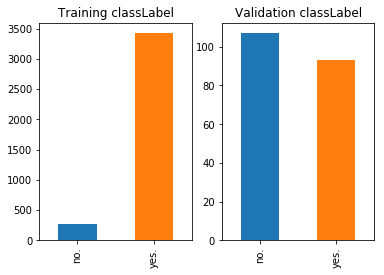

In [14]:
#EXPLORATORY DATA ANALYSIS PLOTTING

#training_preprocess.sort_values(by='classLabel')
#validation_preprocess.sort_values(by='classLabel')

fig, (ax1, ax2) = plt.subplots(1, 2)

training_preprocess['classLabel'].value_counts().reindex(["no.", "yes."]).plot(kind='bar', ax=ax1)
ax1.yaxis.set_label_text("")
ax1.set_title("Training classLabel")
fig.subplots_adjust(hspace=0.5)

validation_preprocess['classLabel'].value_counts().reindex(["no.", "yes."]).plot(kind='bar', ax=ax2)
ax2.yaxis.set_label_text("")
ax2.set_title("Validation classLabel")
fig.subplots_adjust(hspace=0.5)

Text(0.5,1,'Training v1')

Text(0.5,1,'Validation v1')

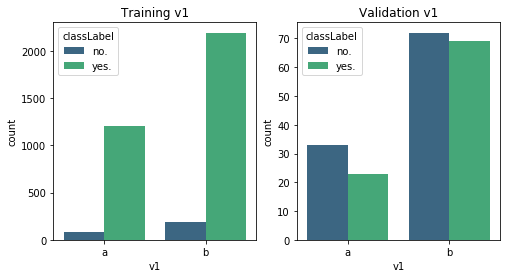

In [15]:
#EXPLORATORY DATA ANALYSIS PLOTTING

#fig, (ax1, ax2) = plt.subplots(1, 2)

#training_preprocess['v1'].value_counts().plot(kind='bar', ax=ax1)
#ax1.yaxis.set_label_text("")
#ax1.set_title("Training v1")
#fig.subplots_adjust(hspace=0.5)

#validation_preprocess['v1'].value_counts().plot(kind='bar', ax=ax2)
#ax2.yaxis.set_label_text("")
#ax2.set_title("Validation v1")
#fig.subplots_adjust(hspace=0.5)

fig ,ax = plt.subplots(1,2,figsize=(8,4))

ax1,ax2 = ax.flatten()
sns.countplot(data=training_preprocess,x='v1',hue='classLabel',palette='viridis', ax=ax1, order=['a', 'b'])
sns.countplot(data=validation_preprocess,x='v1',hue='classLabel',palette='viridis', ax=ax2, order=['a', 'b'])

ax1.set_title("Training v1")
ax2.set_title("Validation v1")
fig.subplots_adjust(hspace=0.5)

Text(0,0.5,'')

Text(0.5,1,'Training v2')

Text(0,0.5,'')

Text(0.5,1,'Validation v2')

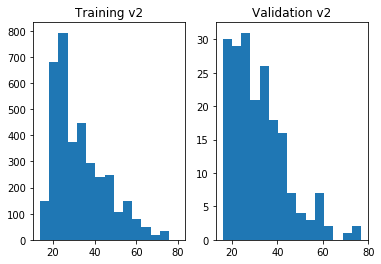

In [16]:
#EXPLORATORY DATA ANALYSIS PLOTTING

fig, (ax1, ax2) = plt.subplots(1, 2)

training_preprocess['v2'].plot(kind='hist', ax=ax1, bins = 15)
ax1.yaxis.set_label_text("")
ax1.set_title("Training v2")
fig.subplots_adjust(hspace=0.5)

validation_preprocess['v2'].plot(kind='hist', ax=ax2,  bins = 15)
ax2.yaxis.set_label_text("")
ax2.set_title("Validation v2")
fig.subplots_adjust(hspace=0.5)

#df = df['A'].fillna(axis=0, method='ffill')
#df.fillna(df.mean(), inplace=True)

#fig,ax = plt.subplots(2,2,figsize=(8,8))
#ax1,ax2,ax3,ax4 = ax.flatten()

#sns.distplot(training_preprocess['v2'],bins=15,color='blue',ax=ax1)
#sns.distplot(validation_preprocess['v2'],bins=15,color='blue',ax=ax2)
#sns.boxplot(y='v2',x='classLabel',data=training_preprocess,ax=ax3)
#sns.boxplot(y='v2',x='classLabel',data=validation_preprocess,ax=ax4)

#ax1.set_title("Training v2")
#ax2.set_title("Validation v2")
#ax3.set_title("Training v2")
#ax4.set_title("Validation v2")
#fig.subplots_adjust(hspace=0.25)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Training v3')

Text(0.5,1,'Validation v3')

Text(0.5,1,'Training v3')

Text(0.5,1,'Validation v3')

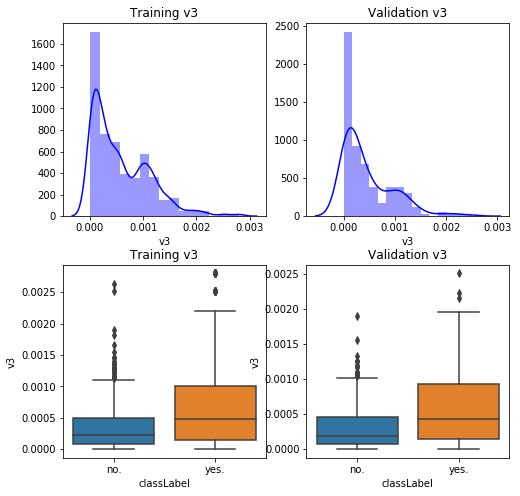

In [17]:
#EXPLORATORY DATA ANALYSIS PLOTTING

#fig, (ax1, ax2) = plt.subplots(1, 2)

#training_preprocess['v3'].plot(kind='hist', ax=ax1, bins = 15)
#ax1.yaxis.set_label_text("")
#ax1.set_title("Training v3")
#fig.subplots_adjust(hspace=0.5)

#validation_preprocess['v3'].plot(kind='hist', ax=ax2,  bins = 15)
#ax2.yaxis.set_label_text("")
#ax2.set_title("Validation v3")
#fig.subplots_adjust(hspace=0.5)

fig,ax = plt.subplots(2,2,figsize=(8,8))
ax1,ax2,ax3,ax4 = ax.flatten()

sns.distplot(training_preprocess['v3'],bins=15,color='blue',ax=ax1)
sns.distplot(validation_preprocess['v3'],bins=15,color='blue',ax=ax2)
sns.boxplot(y='v3',x='classLabel',data=training_preprocess,ax=ax3)
sns.boxplot(y='v3',x='classLabel',data=validation_preprocess,ax=ax4)

ax1.set_title("Training v3")
ax2.set_title("Validation v3")
ax3.set_title("Training v3")
ax4.set_title("Validation v3")
fig.subplots_adjust(hspace=0.25)

Text(0.5,1,'Training v4')

Text(0.5,1,'Validation v4')

v4
l      32
u    3055
y     549
dtype: int64

v4
u    149
y     49
dtype: int64

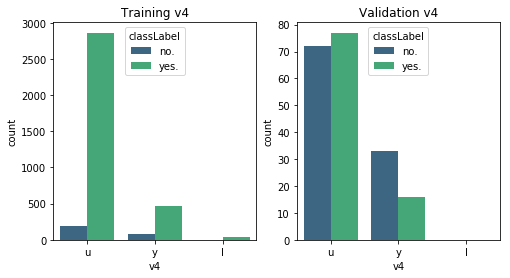

In [18]:
#EXPLORATORY DATA ANALYSIS PLOTTING

#fig, (ax1, ax2) = plt.subplots(1, 2)

#training_preprocess['v4'].value_counts().plot(kind='bar', ax=ax1)
#ax1.yaxis.set_label_text("")
#ax1.set_title("Training v4")
#fig.subplots_adjust(hspace=0.5)

#validation_preprocess['v4'].value_counts().plot(kind='bar', ax=ax2)
#ax2.yaxis.set_label_text("")
#ax2.set_title("Validation v4")
#fig.subplots_adjust(hspace=0.5)

fig ,ax = plt.subplots(1,2,figsize=(8,4))

ax1,ax2 = ax.flatten()
sns.countplot(data=training_preprocess,x='v4',hue='classLabel',palette='viridis',ax=ax1, order=['u','y','l'])
sns.countplot(data=validation_preprocess,x='v4',hue='classLabel',palette='viridis',ax=ax2, order=['u','y','l'])

ax1.set_title("Training v4")
ax2.set_title("Validation v4")
fig.subplots_adjust(hspace=0.5)

#check class counts in datasets
training_preprocess.groupby('v4').size()
validation_preprocess.groupby('v4').size()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Training v5')

Text(0.5,1,'Validation v5')

Text(0.5,1,'Training v5')

Text(0.5,1,'Validation v5')

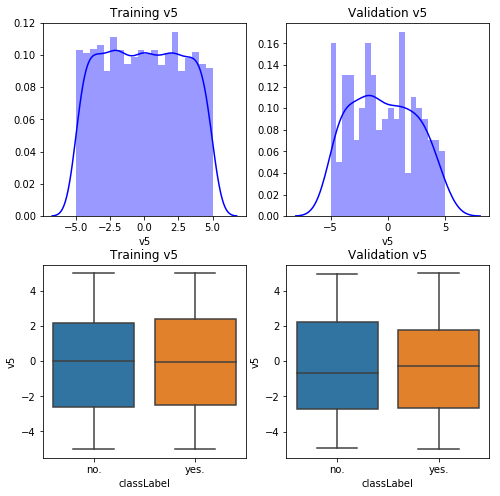

In [19]:
fig,ax = plt.subplots(2,2,figsize=(8,8))
ax1,ax2,ax3,ax4 = ax.flatten()

sns.distplot(training_preprocess['v5'],bins=20,color='blue',ax=ax1)
sns.distplot(validation_preprocess['v5'],bins=20,color='blue',ax=ax2)
sns.boxplot(y='v5',x='classLabel',data=training_preprocess,ax=ax3)
sns.boxplot(y='v5',x='classLabel',data=validation_preprocess,ax=ax4)

ax1.set_title("Training v5")
ax2.set_title("Validation v5")
ax3.set_title("Training v5")
ax4.set_title("Validation v5")
fig.subplots_adjust(hspace=0.25)


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Training v6')

Text(0.5,1,'Validation v6')

Text(0.5,1,'Training v6')

Text(0.5,1,'Validation v6')

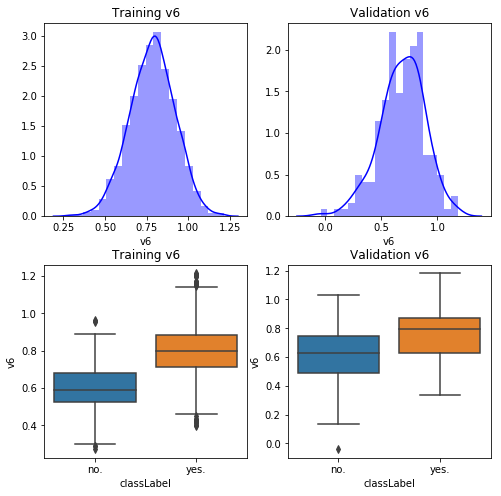

In [20]:
#EXPLORATORY DATA ANALYSIS PLOTTING

#fig, (ax1, ax2) = plt.subplots(1, 2)

#training_preprocess['v6'].plot(kind='hist', ax=ax1, bins = 20)
#ax1.yaxis.set_label_text("")
#ax1.set_title("Training v6")
#fig.subplots_adjust(hspace=0.5)

#validation_preprocess['v6'].plot(kind='hist', ax=ax2,  bins = 20)
#ax2.yaxis.set_label_text("")
#ax2.set_title("Validation v6")
#fig.subplots_adjust(hspace=0.5)

fig,ax = plt.subplots(2,2,figsize=(8,8))
ax1,ax2,ax3,ax4 = ax.flatten()

sns.distplot(training_preprocess['v6'],bins=20,color='blue',ax=ax1)
sns.distplot(validation_preprocess['v6'],bins=20,color='blue',ax=ax2)
sns.boxplot(y='v6',x='classLabel',data=training_preprocess,ax=ax3)
sns.boxplot(y='v6',x='classLabel',data=validation_preprocess,ax=ax4)

ax1.set_title("Training v6")
ax2.set_title("Validation v6")
ax3.set_title("Training v6")
ax4.set_title("Validation v6")
fig.subplots_adjust(hspace=0.25)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Training v7')

Text(0.5,1,'Validation v7')

Text(0.5,1,'Training v7')

Text(0.5,1,'Validation v7')

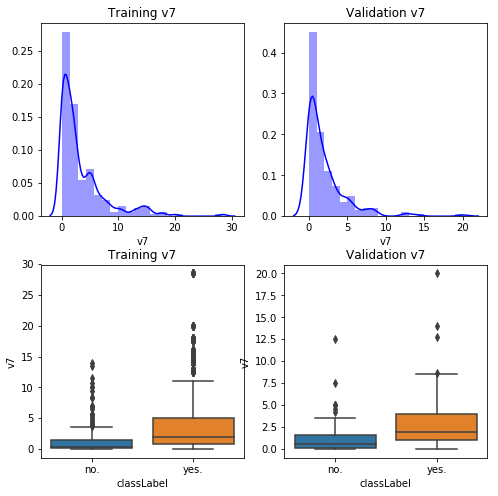

In [21]:
#EXPLORATORY DATA ANALYSIS PLOTTING

#fig, (ax1, ax2) = plt.subplots(1, 2)

#training_preprocess['v7'].plot(kind='hist', ax=ax1, bins = 20)
#ax1.yaxis.set_label_text("")
#ax1.set_title("Training v7")
#fig.subplots_adjust(hspace=0.5)

#validation_preprocess['v7'].plot(kind='hist', ax=ax2,  bins = 20)
#ax2.yaxis.set_label_text("")
#ax2.set_title("Validation v7")
#fig.subplots_adjust(hspace=0.5)

fig,ax = plt.subplots(2,2,figsize=(8,8))
ax1,ax2,ax3,ax4 = ax.flatten()

sns.distplot(training_preprocess['v7'],bins=20,color='blue',ax=ax1)
sns.distplot(validation_preprocess['v7'],bins=20,color='blue',ax=ax2)
sns.boxplot(y='v7',x='classLabel',data=training_preprocess,ax=ax3)
sns.boxplot(y='v7',x='classLabel',data=validation_preprocess,ax=ax4)

ax1.set_title("Training v7")
ax2.set_title("Validation v7")
ax3.set_title("Training v7")
ax4.set_title("Validation v7")
fig.subplots_adjust(hspace=0.25)

Text(0.5,1,'Training v8')

Text(0.5,1,'Validation v8')

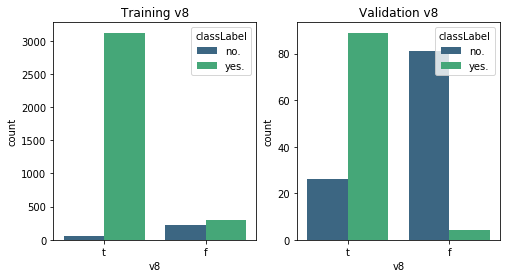

In [22]:
#EXPLORATORY DATA ANALYSIS PLOTTING

#fig, (ax1, ax2) = plt.subplots(1, 2)

#training_preprocess['v8'].value_counts().plot(kind='bar', ax=ax1)
#ax1.yaxis.set_label_text("")
#ax1.set_title("Training v8")
#fig.subplots_adjust(hspace=0.5)

#validation_preprocess['v8'].value_counts().plot(kind='bar', ax=ax2)
#ax2.yaxis.set_label_text("")
#ax2.set_title("Validation v8")
#fig.subplots_adjust(hspace=0.5)

fig ,ax = plt.subplots(1,2,figsize=(8,4))

ax1,ax2 = ax.flatten()
sns.countplot(data=training_preprocess,x='v8',hue='classLabel',palette='viridis',ax=ax1, order=['t', 'f'])
sns.countplot(data=validation_preprocess,x='v8',hue='classLabel',palette='viridis',ax=ax2, order=['t', 'f'])

ax1.set_title("Training v8")
ax2.set_title("Validation v8")
fig.subplots_adjust(hspace=0.5)

Text(0.5,1,'Training v9')

Text(0.5,1,'Validation v9')

v9
f    1461
t    2239
dtype: int64

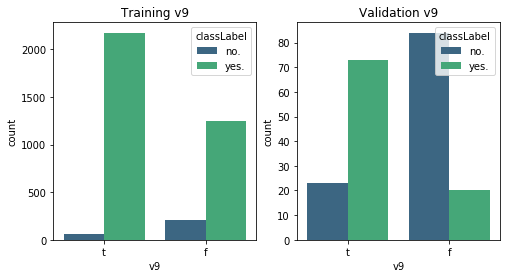

In [23]:
#EXPLORATORY DATA ANALYSIS PLOTTING

#fig, (ax1, ax2) = plt.subplots(1, 2)

#training_preprocess['v9'].value_counts().plot(kind='bar', ax=ax1)
#ax1.yaxis.set_label_text("")
#ax1.set_title("Training v9")
#fig.subplots_adjust(hspace=0.5)

#validation_preprocess['v9'].value_counts().plot(kind='bar', ax=ax2)
#ax2.yaxis.set_label_text("")
#ax2.set_title("Validation v9")
#fig.subplots_adjust(hspace=0.5)

fig ,ax = plt.subplots(1,2,figsize=(8,4))

ax1,ax2 = ax.flatten()
sns.countplot(data=training_preprocess,x='v9',hue='classLabel',palette='viridis',ax=ax1, order=['t', 'f'])
sns.countplot(data=validation_preprocess,x='v9',hue='classLabel',palette='viridis',ax=ax2, order=['t', 'f'])

ax1.set_title("Training v9")
ax2.set_title("Validation v9")
fig.subplots_adjust(hspace=0.5)

training_preprocess.groupby('v9').size()

Text(0,0.5,'')

Text(0.5,1,'Training v10')

Text(0,0.5,'')

Text(0.5,1,'Validation v10')

v10
0     1461
1      367
2      227
3      260
4      130
5      193
6      194
7      161
8       64
9       80
10      34
11     193
12      80
13      16
14      32
15      64
16      48
17      16
19      16
20      16
23      16
40      16
67      16
dtype: int64

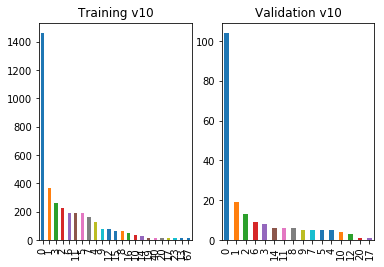

In [24]:
#EXPLORATORY DATA ANALYSIS PLOTTING

fig, (ax1, ax2) = plt.subplots(1, 2)

training_preprocess['v10'].value_counts().plot(kind='bar', ax=ax1)
ax1.yaxis.set_label_text("")
ax1.set_title("Training v10")
fig.subplots_adjust(hspace=0.5)

validation_preprocess['v10'].value_counts().plot(kind='bar', ax=ax2)
ax2.yaxis.set_label_text("")
ax2.set_title("Validation v10")
fig.subplots_adjust(hspace=0.5)

training_preprocess.groupby('v10').size()

Text(0.5,1,'Training v11')

Text(0.5,1,'Validation v11')

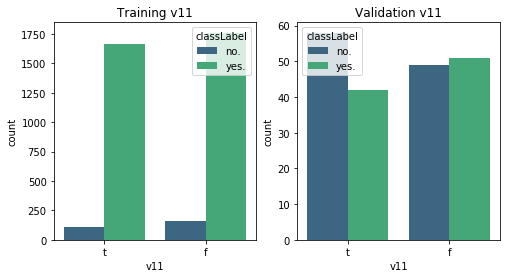

In [25]:
#EXPLORATORY DATA ANALYSIS PLOTTING

#fig, (ax1, ax2) = plt.subplots(1, 2)

#training_preprocess['v11'].value_counts().plot(kind='bar', ax=ax1)
#ax1.yaxis.set_label_text("")
#ax1.set_title("Training v11")
#fig.subplots_adjust(hspace=0.5)

#validation_preprocess['v11'].value_counts().plot(kind='bar', ax=ax2)
#ax2.yaxis.set_label_text("")
#ax2.set_title("Validation v11")
#fig.subplots_adjust(hspace=0.5)

fig ,ax = plt.subplots(1,2,figsize=(8,4))

ax1,ax2 = ax.flatten()
sns.countplot(data=training_preprocess,x='v11',hue='classLabel',palette='viridis',ax=ax1, order=['t', 'f'])
sns.countplot(data=validation_preprocess,x='v11',hue='classLabel',palette='viridis',ax=ax2, order=['t', 'f'])

ax1.set_title("Training v11")
ax2.set_title("Validation v11")
fig.subplots_adjust(hspace=0.5)

Text(0.5,1,'Training v12')

Text(0.5,1,'Validation v12')

v12
g    3430
p      81
s     189
dtype: int64

v12
g    180
o      1
p      2
s     17
dtype: int64

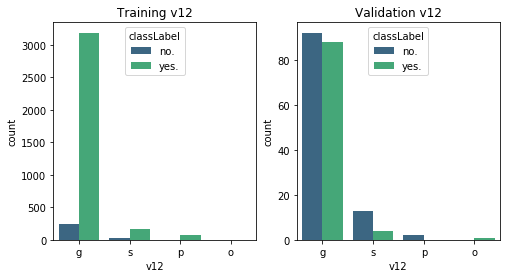

In [26]:
#EXPLORATORY DATA ANALYSIS PLOTTING

#fig, (ax1, ax2) = plt.subplots(1, 2)

#training_preprocess['v12'].value_counts().plot(kind='bar', ax=ax1)
#ax1.yaxis.set_label_text("")
#ax1.set_title("Training v12")
#fig.subplots_adjust(hspace=0.5)

#validation_preprocess['v12'].value_counts().plot(kind='bar', ax=ax2)
#ax2.yaxis.set_label_text("")
#ax2.set_title("Validation v12")
#fig.subplots_adjust(hspace=0.5)

fig ,ax = plt.subplots(1,2,figsize=(8,4))

ax1,ax2 = ax.flatten()
sns.countplot(data=training_preprocess,x='v12',hue='classLabel',palette='viridis',ax=ax1, order=['g', 's', 'p', 'o'])
sns.countplot(data=validation_preprocess,x='v12',hue='classLabel',palette='viridis',ax=ax2, order=['g', 's', 'p', 'o'])

ax1.set_title("Training v12")
ax2.set_title("Validation v12")
fig.subplots_adjust(hspace=0.5)

#check class counts in datasets
training_preprocess.groupby('v12').size()
validation_preprocess.groupby('v12').size()

Text(0,0.5,'')

Text(0.5,1,'Training v13')

Text(0,0.5,'')

Text(0.5,1,'Validation v13')

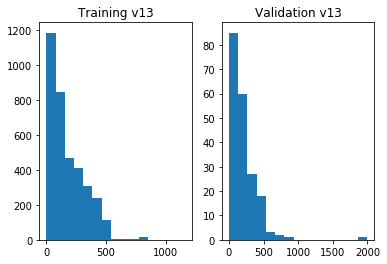

In [27]:
#EXPLORATORY DATA ANALYSIS PLOTTING

fig, (ax1, ax2) = plt.subplots(1, 2)

training_preprocess['v13'].plot(kind='hist', ax=ax1, bins = 15)
ax1.yaxis.set_label_text("")
ax1.set_title("Training v13")
fig.subplots_adjust(hspace=0.5)

validation_preprocess['v13'].plot(kind='hist', ax=ax2,  bins = 15)
ax2.yaxis.set_label_text("")
ax2.set_title("Validation v13")
fig.subplots_adjust(hspace=0.5)

#fig,ax = plt.subplots(2,2,figsize=(8,8))
#ax1,ax2,ax3,ax4 = ax.flatten()

#sns.distplot(training_preprocess['v13'],bins=15,color='blue',ax=ax1)
#sns.distplot(validation_preprocess['v13'],bins=15,color='blue',ax=ax2)
#sns.boxplot(y='v13',x='classLabel',data=training_preprocess,ax=ax3)
#sns.boxplot(y='v13',x='classLabel',data=validation_preprocess,ax=ax4)

#ax1.set_title("Training v13")
#ax2.set_title("Validation v13")
#ax3.set_title("Training v13")
#ax4.set_title("Validation v13")
#fig.subplots_adjust(hspace=0.25)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Training v14')

Text(0.5,1,'Validation v14')

Text(0.5,1,'Training v14')

Text(0.5,1,'Validation v14')

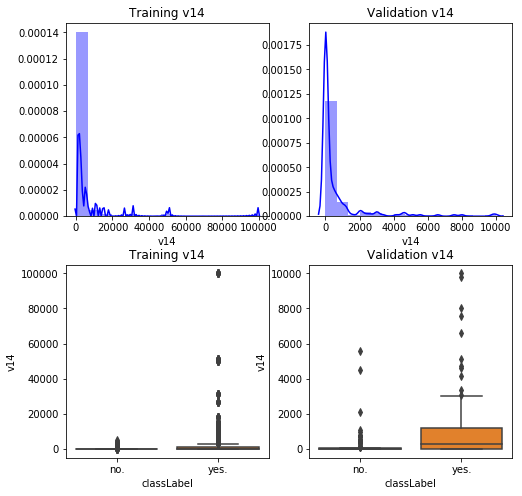

In [28]:
#EXPLORATORY DATA ANALYSIS PLOTTING

#fig, (ax1, ax2) = plt.subplots(1, 2)

#training_preprocess['v14'].plot(kind='hist', ax=ax1, bins = 15)
#ax1.yaxis.set_label_text("")
#ax1.set_title("Training v14")
#fig.subplots_adjust(hspace=0.5)

#validation_preprocess['v14'].plot(kind='hist', ax=ax2,  bins = 15)
#ax2.yaxis.set_label_text("")
#ax2.set_title("Validation v14")
#fig.subplots_adjust(hspace=0.5)

fig,ax = plt.subplots(2,2,figsize=(8,8))
ax1,ax2,ax3,ax4 = ax.flatten()

sns.distplot(training_preprocess['v14'],bins=15,color='blue',ax=ax1)
sns.distplot(validation_preprocess['v14'],bins=15,color='blue',ax=ax2)
sns.boxplot(y='v14',x='classLabel',data=training_preprocess,ax=ax3)
sns.boxplot(y='v14',x='classLabel',data=validation_preprocess,ax=ax4)

ax1.set_title("Training v14")
ax2.set_title("Validation v14")
ax3.set_title("Training v14")
ax4.set_title("Validation v14")
fig.subplots_adjust(hspace=0.25)

Text(0,0.5,'')

Text(0.5,1,'Training v15')

Text(0,0.5,'')

Text(0.5,1,'Validation v15')

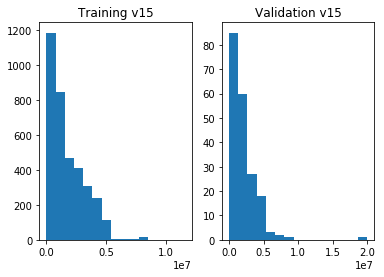

In [29]:
#EXPLORATORY DATA ANALYSIS PLOTTING

fig, (ax1, ax2) = plt.subplots(1, 2)

training_preprocess['v15'].plot(kind='hist', ax=ax1, bins = 15)
ax1.yaxis.set_label_text("")
ax1.set_title("Training v15")
fig.subplots_adjust(hspace=0.5)

validation_preprocess['v15'].plot(kind='hist', ax=ax2,  bins = 15)
ax2.yaxis.set_label_text("")
ax2.set_title("Validation v15")
fig.subplots_adjust(hspace=0.5)

#fig,ax = plt.subplots(2,2,figsize=(8,8))
#ax1,ax2,ax3,ax4 = ax.flatten()

#sns.distplot(training_preprocess['v15'],bins=15,color='blue',ax=ax1)
#sns.distplot(validation_preprocess['v15'],bins=15,color='blue',ax=ax2)
#sns.boxplot(y='v15',x='classLabel',data=training_preprocess,ax=ax3)
#sns.boxplot(y='v15',x='classLabel',data=validation_preprocess,ax=ax4)

#ax1.set_title("Training v15")
#ax2.set_title("Validation v15")
#ax3.set_title("Training v15")
#ax4.set_title("Validation v15")
#fig.subplots_adjust(hspace=0.25)

Text(0.5,1,'Training v16')

Text(0.5,1,'Validation v16')

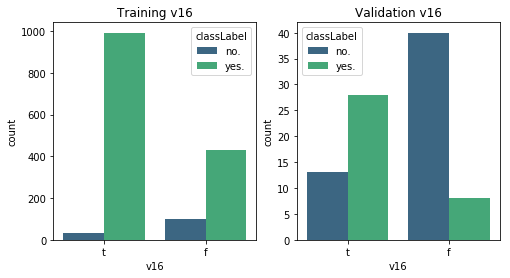

In [30]:
#EXPLORATORY DATA ANALYSIS PLOTTING

#fig, (ax1, ax2) = plt.subplots(1, 2)

#training_preprocess['v16'].value_counts().plot(kind='bar', ax=ax1)
#ax1.yaxis.set_label_text("")
#ax1.set_title("Training v16")
#fig.subplots_adjust(hspace=0.5)

#validation_preprocess['v16'].value_counts().plot(kind='bar', ax=ax2)
#ax2.yaxis.set_label_text("")
#ax2.set_title("Validation v16")
#fig.subplots_adjust(hspace=0.5)

fig ,ax = plt.subplots(1,2,figsize=(8,4))

ax1,ax2 = ax.flatten()
sns.countplot(data=training_preprocess,x='v16',hue='classLabel',palette='viridis',ax=ax1, order=['t', 'f'])
sns.countplot(data=validation_preprocess,x='v16',hue='classLabel',palette='viridis',ax=ax2, order=['t', 'f'])

ax1.set_title("Training v16")
ax2.set_title("Validation v16")
fig.subplots_adjust(hspace=0.5)

Text(0.5,1,'Training v17')

Text(0.5,1,'Validation v17')

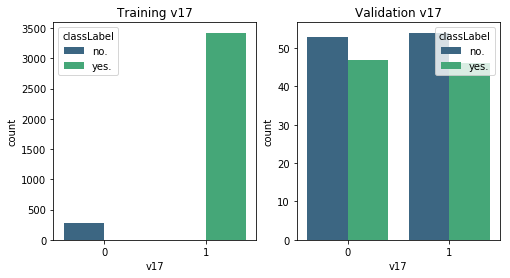

In [31]:
#EXPLORATORY DATA ANALYSIS PLOTTING

#fig, (ax1, ax2) = plt.subplots(1, 2)

#training_preprocess['v17'].value_counts().plot(kind='bar', ax=ax1)
#ax1.yaxis.set_label_text("")
#ax1.set_title("Training v17")
#fig.subplots_adjust(hspace=0.5)

#validation_preprocess['v17'].value_counts().plot(kind='bar', ax=ax2)
#ax2.yaxis.set_label_text("")
#ax2.set_title("Validation v17")

#fig.subplots_adjust(hspace=0.5)

fig ,ax = plt.subplots(1,2,figsize=(8,4))

ax1,ax2 = ax.flatten()
sns.countplot(data=training_preprocess,x='v17',hue='classLabel',palette='viridis',ax=ax1)
sns.countplot(data=validation_preprocess,x='v17',hue='classLabel',palette='viridis',ax=ax2)

ax1.set_title("Training v17")
ax2.set_title("Validation v17")
fig.subplots_adjust(hspace=0.5)

In [32]:
#convert classLabel to binary rather than text
le = LabelEncoder()
training_preprocess['classLabel'] = le.fit_transform(training_preprocess['classLabel'])
validation_preprocess['classLabel'] = le.fit_transform(validation_preprocess['classLabel'])

#sort by index
training_preprocess = training_preprocess.sort_index()
validation_preprocess = validation_preprocess.sort_index()

#check data
#training.head()
#training_preprocess.head()
#validation_preprocess.head()

<Figure size 864x432 with 0 Axes>

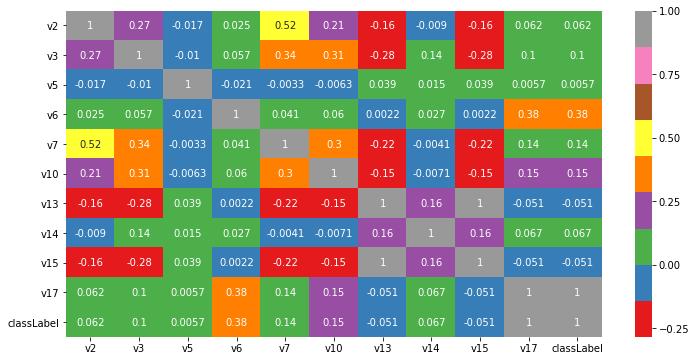

In [33]:
#view top rows of train and test
#training_preprocess.head()

#check correlations of numerical variables
cor = training_preprocess.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

<Figure size 864x432 with 0 Axes>

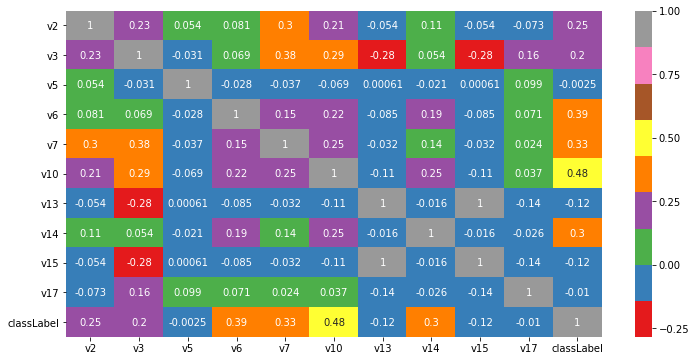

In [34]:
#view top rows of train and test
#validation_preprocess.head()

#check correlations of numerical variables
cor = validation_preprocess.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

In [35]:
#DEAL WITH MISSING VALUES
training_preprocess.head()

#training_preprocess.isnull().sum()

#na percentages in training data
#v1             1.054054 categorical remove rows
#v2             1.054054 continuous add median/mode/mean
#v4             1.729730 categorical remove rows
#v13            2.702703 continuous add median/mode/mean

train_final = training_preprocess.copy()

#Drop missing observations in v1
train_final = train_final.dropna(subset=['v1'])
#fill missing observations in v2 with median
train_final['v2'].fillna(train_final['v2'].median(), inplace=True)
#Drop missing observations in v4
train_final = train_final.dropna(subset=['v4'])
#fill missing observations in v13 with median
train_final['v13'].fillna(train_final['v13'].median(), inplace=True)

validation_final = validation_preprocess.copy()

#Drop missing observations in v1
validation_final = validation_final.dropna(subset=['v1'])
#fill missing observations in v2 with median
validation_final['v2'].fillna(validation_final['v2'].median(), inplace=True)
#Drop missing observations in v4
validation_final = validation_final.dropna(subset=['v4'])
#fill missing observations in v13 with median
validation_final['v13'].fillna(validation_final['v13'].median(), inplace=True)

train_final.isnull().sum()
validation_final.isnull().sum()

#print shape of train and test
print('Number rows and columns in Train:',train_final.shape)
print('Number rows and columns in Validation:',validation_final.shape)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,a,17.92,0.000054,u,-0.840182,0.522883,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,0
1,b,16.92,0.000034,y,-2.159635,0.774187,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0,0
2,b,31.25,0.000112,u,1.750687,0.760363,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,0
3,a,48.17,0.000133,u,4.174871,0.888963,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0,0
4,b,32.33,0.000350,u,-3.785479,0.489024,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,0


v1               0
v2               0
v3               0
v4               0
v5               0
v6               0
v7               0
v8               0
v9               0
v10              0
v11              0
v12              0
v13              0
v14              0
v15             36
v16           2080
v17              0
classLabel       0
dtype: int64

v1              0
v2              0
v3              0
v4              0
v5              0
v6              0
v7              0
v8              0
v9              0
v10             0
v11             0
v12             0
v13             0
v14             0
v15             1
v16           110
v17             0
classLabel      0
dtype: int64

Number rows and columns in Train: (3597, 18)
Number rows and columns in Validation: (195, 18)


In [36]:
#REMOVE OTHER OBSERVATIONS THAT WILL AFFECT THE MODEL. I.E. ENTRIES NOT IN TRAINING AND VALIDATION
#drop 'l' from v4
#drop 'p' & 'o' from v12

train_final = train_final[~train_final.v4.isin(['l'])]
train_final = train_final[~train_final.v12.isin(['p','o'])]
validation_final = validation_final[~validation_final.v4.isin(['l'])]
validation_final = validation_final[~validation_final.v12.isin(['p','o'])]

#fig ,ax = plt.subplots(1,2,figsize=(8,4))

#ax1,ax2 = ax.flatten()
#sns.countplot(data=train_final,x='v4',hue='classLabel',palette='viridis',ax=ax1, order=['u','y','l'])
#sns.countplot(data=validation_final,x='v4',hue='classLabel',palette='viridis',ax=ax2, order=['u','y','l'])

#ax1.set_title("Training v4")
#ax2.set_title("Validation v4")
#fig.subplots_adjust(hspace=0.5)

#check counts in datasets
train_final.groupby('v4').size()
validation_final.groupby('v4').size()
train_final.groupby('v12').size()
validation_final.groupby('v12').size()


v4
u    3018
y     546
dtype: int64

v4
u    146
y     48
dtype: int64

v12
g    3392
s     172
dtype: int64

v12
g    178
s     16
dtype: int64

In [37]:
#ONE HOT ENCODING TO ENABLE CATEGORICAL VARIABLES TO BE USED FOR MODELLING
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

train_final_x = train_final.copy()
validation_final_x = validation_final.copy()

#get dummies
train_final_x = pd.get_dummies(train_final_x, prefix_sep='_', drop_first=True)
validation_final_x = pd.get_dummies(validation_final_x, prefix_sep='_', drop_first=True)

#view top rows
train_final_x.head()
validation_final_x.head()

#summary of data
train_final_x.info()
validation_final_x.info()

#print shape of train and test
print('Number rows and columns in Train:',train_final_x.shape)
print('Number rows and columns in Validation:',validation_final_x.shape)

,v2,v3,v5,v6,v7,v10,v13,v14,v15,v17,classLabel,v1_b,v4_y,v8_t,v9_t,v11_t,v12_s,v16_t
0,17.92,0.000054,-0.840182,0.522883,1.750,1,80.0,5,800000.0,0,0,0,0,0,1,1,0,1
1,16.92,0.000034,-2.159635,0.774187,0.290,0,200.0,0,2000000.0,0,0,1,1,0,0,0,1,0
2,31.25,0.000112,1.750687,0.760363,0.000,1,96.0,19,960000.0,0,0,1,0,0,1,0,0,1
3,48.17,0.000133,4.174871,0.888963,0.335,0,0.0,120,0.0,0,0,0,0,0,0,0,0,0
4,32.33,0.000350,-3.785479,0.489024,0.500,0,232.0,0,2320000.0,0,0,1,0,0,0,1,0,0


,v2,v3,v5,v6,v7,v10,v13,v14,v15,v17,classLabel,v1_b,v4_y,v8_t,v9_t,v11_t,v12_s,v16_t
0,32.33,0.000750,0.840107,0.544982,1.585,0,420.0,0,4200000.0,1,0,1,0,1,0,1,1,0
1,23.58,0.000179,-4.174396,0.864362,0.540,0,136.0,1,1360000.0,0,0,1,0,0,0,1,0,0
2,36.42,0.000075,2.232226,0.627476,0.585,0,240.0,3,2400000.0,1,0,1,1,0,0,0,0,0
3,18.42,0.001041,-2.469970,0.846741,0.125,0,120.0,375,1200000.0,0,0,1,1,1,0,0,0,0
4,24.50,0.001334,-3.149422,0.321087,0.040,0,120.0,475,1200000.0,1,0,1,1,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3564 entries, 0 to 3699
Data columns (total 18 columns):
v2            3564 non-null float64
v3            3564 non-null float64
v5            3564 non-null float64
v6            3564 non-null float64
v7            3564 non-null float64
v10           3564 non-null int64
v13           3564 non-null float64
v14           3564 non-null int64
v15           3528 non-null float64
v17           3564 non-null int64
classLabel    3564 non-null int64
v1_b          3564 non-null uint8
v4_y          3564 non-null uint8
v8_t          3564 non-null uint8
v9_t          3564 non-null uint8
v11_t         3564 non-null uint8
v12_s         3564 non-null uint8
v16_t         3564 non-null uint8
dtypes: float64(7), int64(4), uint8(7)
memory usage: 358.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 199
Data columns (total 18 columns):
v2            194 non-null float64
v3            194 non-null float64
v5            194 non-null flo

In [38]:
#Further check of features

#train_final_x['v5_abs'] = train_final_x['v5'].abs()
#validation_final_x['v5_abs'] = validation_final_x['v5'].abs()

#train_final_x.describe()a
#validation_final_x.describe()

#check correlations of numerical variables
#cor = train_final_x.corr()
#plt.figure(figsize=(12,6))
#sns.heatmap(cor,cmap='Set1',annot=True)

#check for v16 and v9 correlation once v16 missing rows are removed
#v16_check = training_preprocess[['classLabel','v7','v9','v10','v16']]
#v16_check.head()
#print('Number rows and columns in Train:',v16_check.shape)

#v16_check_2 = v16_check.dropna(subset=['v16'])
#print('Number rows and columns in Train:',v16_check_2.shape)

#v16_check_2.loc[v16_check_2['v16'] == v16_check_2['v9'], 'test'] = 1
#v16_check_2.loc[v16_check_2['v16'] == v16_check_2['v7'], 'test2'] = 1
#v16_check_2.head()
#v16_check_2['test'].sum()
#v16_check_2['test2'].sum()

#v16_check_2a = v16_check.copy()
#print('Number rows and columns in Train:',v16_check_2a.shape)

#v16_check_2a.loc[v16_check_2a['v9'] == 't', 'v9_new'] = 1
#v16_check_2a.loc[v16_check_2a['v9'] == 'f', 'v9_new'] = 0
#v16_check_2a.loc[v16_check_2a['v9_new'] == v16_check_2a['v10'], 'test3'] = 1
#v16_check_2a.head(300)
#v16_check_2a['test3'].sum()


In [39]:
#REMOVE CORRELATED OR DUPLICATE FEATURES TO PREVENT MULTICOLLINARITY

#v10 looks to be a duplicate of v9 with dirty data
#v15 is 100% correlated with v13
#v16 looks to be a duplicate of v9 with missing values
#v17 is 100% correlated with classLabel in training
dropped_features = ['v10','v15','v16_t','v17']

train_final_x = train_final_x.drop(dropped_features, axis=1)
validation_final_x = validation_final_x.drop(dropped_features, axis=1)

#print shape of train and test
print('Number rows and columns in Train:',train_final_x.shape)
print('Number rows and columns in Validation:',validation_final_x.shape)

Number rows and columns in Train: (3564, 14)
Number rows and columns in Validation: (194, 14)


In [40]:
#apply log transformation on v14 before normalising to deal with outliers

train_final_x_BACKUP = train_final_x.copy()
validation_final_x_BACKUP = validation_final_x.copy()

train_final_x['v14_log'] = np.log(train_final_x['v14']+1)
validation_final_x['v14_log'] = np.log(validation_final_x['v14']+1)

train_final_x = train_final_x[['classLabel','v2','v3','v5','v6','v7','v13','v14_log','v1_b','v4_y','v8_t','v9_t','v11_t','v12_s','v14']]
validation_final_x = validation_final_x[['classLabel','v2','v3','v5','v6','v7','v13','v14_log','v1_b','v4_y','v8_t','v9_t','v11_t','v12_s','v14']]

train_final_x = train_final_x.drop(['v14'], axis=1)
validation_final_x = validation_final_x.drop(['v14'], axis=1)

train_final_x.head()
validation_final_x.head()

,classLabel,v2,v3,v5,v6,v7,v13,v14_log,v1_b,v4_y,v8_t,v9_t,v11_t,v12_s
0,0,17.92,0.000054,-0.840182,0.522883,1.750,80.0,1.791759,0,0,0,1,1,0
1,0,16.92,0.000034,-2.159635,0.774187,0.290,200.0,0.000000,1,1,0,0,0,1
2,0,31.25,0.000112,1.750687,0.760363,0.000,96.0,2.995732,1,0,0,1,0,0
3,0,48.17,0.000133,4.174871,0.888963,0.335,0.0,4.795791,0,0,0,0,0,0
4,0,32.33,0.000350,-3.785479,0.489024,0.500,232.0,0.000000,1,0,0,0,1,0


,classLabel,v2,v3,v5,v6,v7,v13,v14_log,v1_b,v4_y,v8_t,v9_t,v11_t,v12_s
0,0,32.33,0.000750,0.840107,0.544982,1.585,420.0,0.000000,1,0,1,0,1,1
1,0,23.58,0.000179,-4.174396,0.864362,0.540,136.0,0.693147,1,0,0,0,1,0
2,0,36.42,0.000075,2.232226,0.627476,0.585,240.0,1.386294,1,1,0,0,0,0
3,0,18.42,0.001041,-2.469970,0.846741,0.125,120.0,5.929589,1,1,1,0,0,0
4,0,24.50,0.001334,-3.149422,0.321087,0.040,120.0,6.165418,1,1,0,0,1,0


,classLabel,v2,v3,v5,v6,v7,v13,v14_log,v1_b,v4_y,v8_t,v9_t,v11_t,v12_s
count,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000
mean,0.924804,32.879621,0.000591,-0.052167,0.784034,3.497817,160.018238,3.924890,0.654602,0.153199,0.885241,0.619248,0.488215,0.048260
std,0.263745,12.422350,0.000529,2.875107,0.136763,4.358702,154.259281,3.520633,0.475565,0.360229,0.318775,0.485640,0.499931,0.214346
min,0.000000,13.750000,0.000000,-4.996939,0.273945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.080000,0.000150,-2.522081,0.693121,0.625000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,28.670000,0.000446,-0.053804,0.787890,1.875000,120.000000,4.905275,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,40.830000,0.000963,2.406251,0.875864,5.000000,274.000000,7.099202,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,80.250000,0.002800,4.999274,1.215066,28.500000,980.000000,10.841559,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,classLabel,v2,v3,v5,v6,v7,v13,v14_log,v1_b,v4_y,v8_t,v9_t,v11_t,v12_s
count,194.000000,194.00000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.469072,32.21768,0.000462,-0.396513,0.687758,2.074897,200.561856,3.073022,0.711340,0.247423,0.582474,0.489691,0.505155,0.082474
std,0.500334,12.23064,0.000495,2.820067,0.203142,2.765901,210.053679,3.229695,0.454312,0.432631,0.494427,0.501187,0.501267,0.275798
min,0.000000,15.92000,0.000000,-4.990240,-0.038309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.77000,0.000079,-2.786201,0.559912,0.250000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.67000,0.000260,-0.583593,0.701886,1.085000,160.000000,1.791759,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,39.14750,0.000731,2.178545,0.824852,2.718750,280.000000,6.274216,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,76.75000,0.002508,4.988798,1.181493,20.000000,2000.000000,9.210440,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 864x432 with 0 Axes>

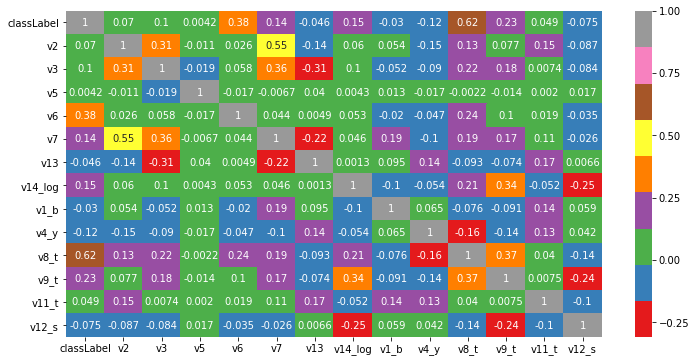

In [41]:
#train_final_x['v5_abs'] = train_final_x['v5'].abs()
#validation_final_x['v5_abs'] = validation_final_x['v5'].abs()

train_final_x.describe()
validation_final_x.describe()

#check correlations of numerical variables
cor = train_final_x.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Training v2')

Text(0.5,1,'Validation v2')

Text(0.5,1,'Training v2')

Text(0.5,1,'Validation v2')

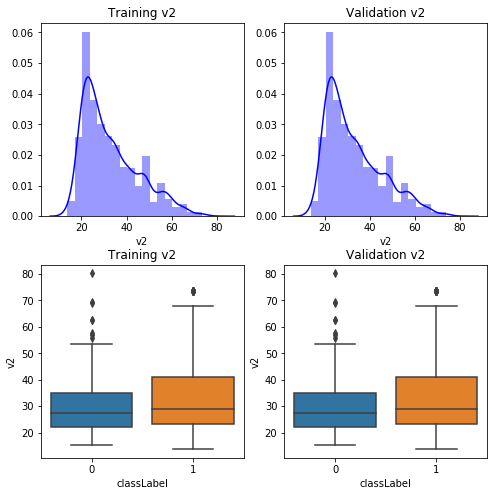

In [42]:
fig,ax = plt.subplots(2,2,figsize=(8,8))
ax1,ax2,ax3,ax4 = ax.flatten()

sns.distplot(train_final_x['v2'],bins=20,color='blue',ax=ax1)
sns.distplot(train_final_x['v2'],bins=20,color='blue',ax=ax2)
sns.boxplot(y='v2',x='classLabel',data=train_final_x,ax=ax3)
sns.boxplot(y='v2',x='classLabel',data=train_final_x,ax=ax4)

ax1.set_title("Training v2")
ax2.set_title("Validation v2")
ax3.set_title("Training v2")
ax4.set_title("Validation v2")
fig.subplots_adjust(hspace=0.25)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Training v7')

Text(0.5,1,'Validation v7')

Text(0.5,1,'Training v7')

Text(0.5,1,'Validation v7')

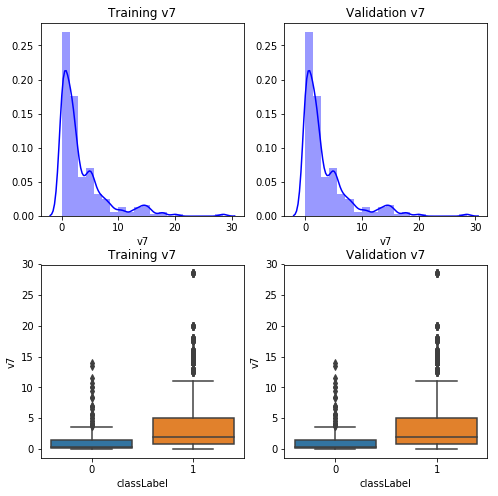

In [43]:
fig,ax = plt.subplots(2,2,figsize=(8,8))
ax1,ax2,ax3,ax4 = ax.flatten()

sns.distplot(train_final_x['v7'],bins=20,color='blue',ax=ax1)
sns.distplot(train_final_x['v7'],bins=20,color='blue',ax=ax2)
sns.boxplot(y='v7',x='classLabel',data=train_final_x,ax=ax3)
sns.boxplot(y='v7',x='classLabel',data=train_final_x,ax=ax4)

ax1.set_title("Training v7")
ax2.set_title("Validation v7")
ax3.set_title("Training v7")
ax4.set_title("Validation v7")
fig.subplots_adjust(hspace=0.25)

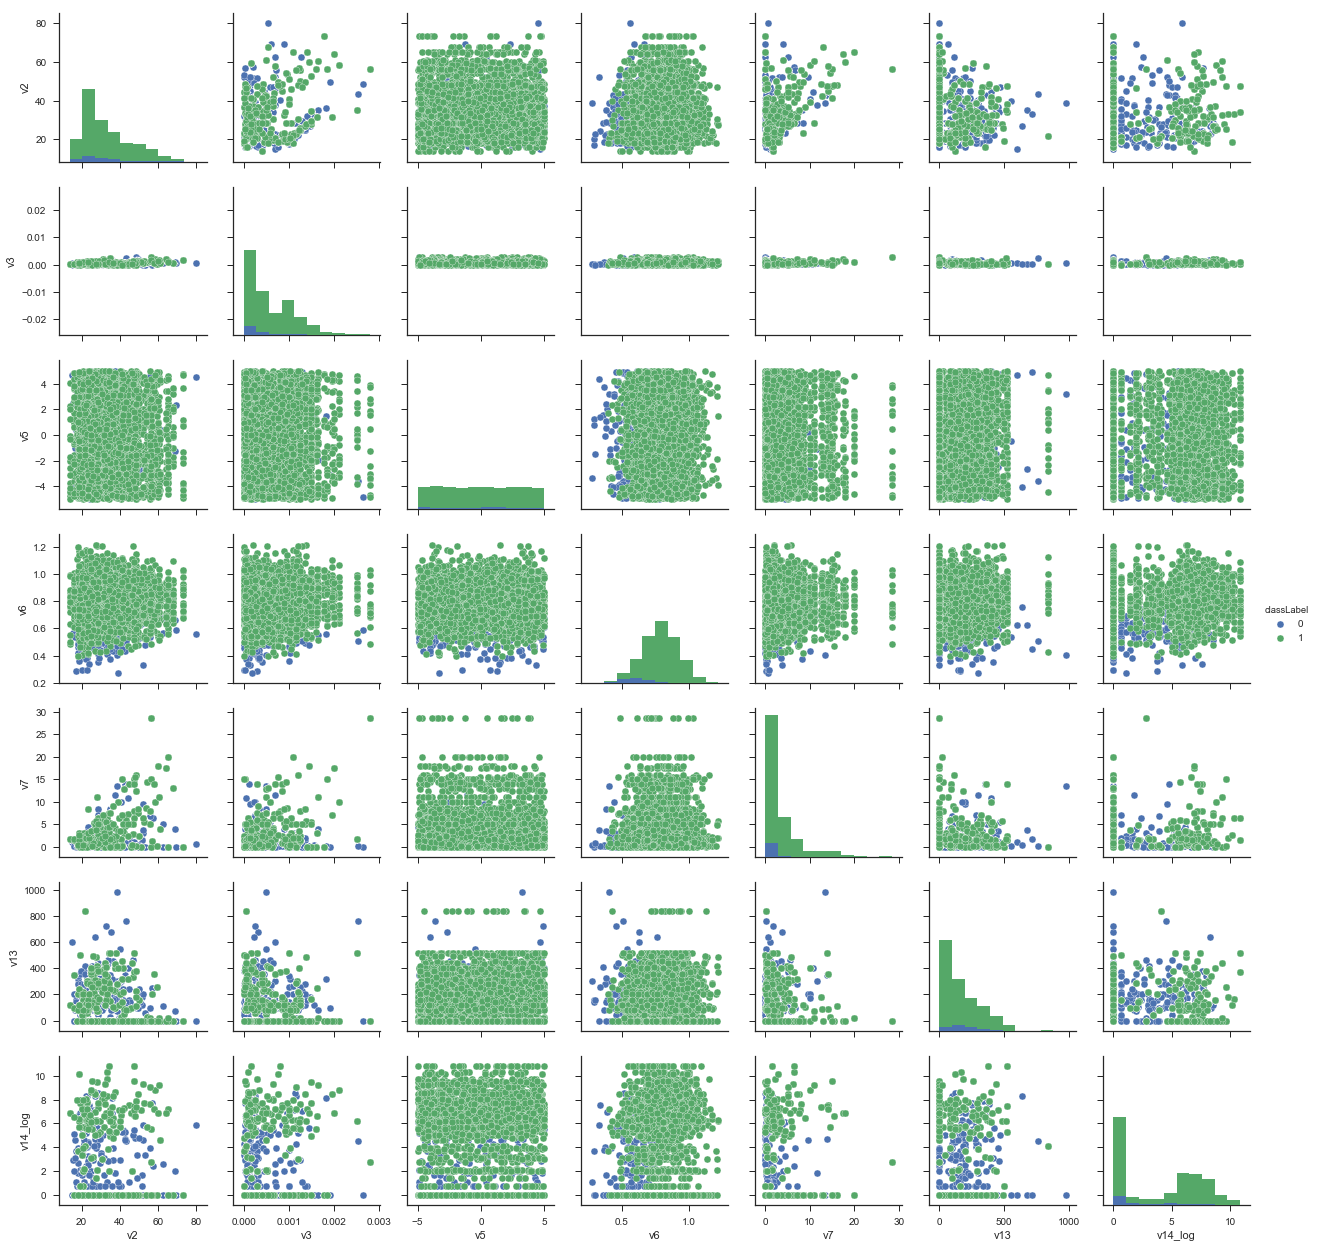

In [44]:
# VISUALISE PAIRWISE RELATIONSHIPS BETWEEN CONTINUOUS VARIABLES

import seaborn as sns
sns.set(style="ticks")

sns.pairplot(train_final_x, hue="classLabel", vars=['v2','v3','v5','v6','v7','v13','v14_log'])

In [45]:
#sns.pairplot(validation_final_x, hue="classLabel", vars=['v2','v3','v5','v6','v7','v13','v14_log'])

In [46]:
#NORMALISE

#import normalising modules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_train = train_final_x.loc[:, train_final_x.columns != 'classLabel']
y_train = train_final_x.loc[:, train_final_x.columns == 'classLabel']

#numpy arrays of train data before scaling
X_train_np = np.asarray(X_train)
y_train_np = np.asarray(y_train)
#y = np.array(y).squeeze()

#scale train data between 0 and 1
scaler = MinMaxScaler()
scaled_X_train_np = scaler.fit_transform(X_train_np)

#check numpy file types, shape and view data
type(scaled_X_train_np)
type(y_train_np)

scaled_X_train_np.shape
y_train_np.shape

scaled_X_train_np.view()

#also create a pandas version of scaled data
cols=['v2','v3','v5','v6','v7','v13','v14_log','v1_b','v4_y','v8_t','v9_t','v11_t','v12_s'] 
X_train_pd = pd.DataFrame(scaled_X_train_np,columns=cols)
y_train_pd = pd.DataFrame(y_train_np,columns=['classLabel'])

#check pandas file types and view data
type(X_train_pd)
type(y_train_pd)

X_train_pd.head()
y_train_pd.head()

X_train_pd.shape
y_train_pd.shape

#fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
#ax1.set_title('Before Scaling')
#sns.kdeplot(scaled_df_pd['v2'], ax=ax1)
#sns.kdeplot(scaled_df_pd['v7'], ax=ax1)
#ax2.set_title('After Min-Max Scaling')
#sns.kdeplot(scaled_df['x1'], ax=ax2)
#sns.kdeplot(scaled_df['x2'], ax=ax2)
#sns.kdeplot(scaled_df['x3'], ax=ax2)
#plt.show()

numpy.ndarray

numpy.ndarray

(3564, 13)

(3564, 1)

array([[0.06270677, 0.01928571, 0.41583318, ..., 1.        , 1.        ,
        0.        ],
       [0.04766917, 0.01196429, 0.28383789, ..., 0.        , 0.        ,
        1.        ],
       [0.26315789, 0.04017857, 0.6750182 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.30706767, 0.3275    , 0.91092288, ..., 1.        , 1.        ,
        0.        ],
       [0.21172932, 0.055     , 0.84651207, ..., 1.        , 1.        ,
        0.        ],
       [0.34586466, 0.18303571, 0.94893688, ..., 0.        , 1.        ,
        0.        ]])

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

,v2,v3,v5,v6,v7,v13,v14_log,v1_b,v4_y,v8_t,v9_t,v11_t,v12_s
0,0.062707,0.019286,0.415833,0.264512,0.061404,0.081633,0.165268,0.0,0.0,0.0,1.0,1.0,0.0
1,0.047669,0.011964,0.283838,0.531539,0.010175,0.204082,0.000000,1.0,1.0,0.0,0.0,0.0,1.0
2,0.263158,0.040179,0.675018,0.516849,0.000000,0.097959,0.276319,1.0,0.0,0.0,1.0,0.0,0.0
3,0.517594,0.047679,0.917528,0.653495,0.011754,0.000000,0.442352,0.0,0.0,0.0,0.0,0.0,0.0
4,0.279398,0.125000,0.121192,0.228535,0.017544,0.236735,0.000000,1.0,0.0,0.0,0.0,1.0,0.0


,classLabel
0,0
1,0
2,0
3,0
4,0


(3564, 13)

(3564, 1)

In [47]:
#SMOTE OVERSAMPLING ON TRAINING DATA 

from imblearn.over_sampling import SMOTE

X_train = X_train_pd.copy()
y_train = y_train_pd.copy()

os = SMOTE(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
X_train_pd = pd.DataFrame(data=os_data_X,columns=columns )
y_train_pd = pd.DataFrame(data=os_data_y,columns=['classLabel'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(X_train_pd))
print("Number of NO oversampled data",len(y_train_pd[y_train_pd['classLabel']==0]))
print("Number of YES",len(y_train_pd[y_train_pd['classLabel']==1]))
print("Proportion of NO in oversampled data is ",len(y_train_pd[y_train_pd['classLabel']==0])/len(X_train_pd))
print("Proportion of YES in oversampled data is ",len(y_train_pd[y_train_pd['classLabel']==1])/len(X_train_pd))

type(X_train)
type(y_train)
type(os_data_X)
type(os_data_y)

X_train_np = np.asarray(X_train_pd)
y_train_np = np.asarray(y_train_pd).squeeze()

X_train.shape
y_train.shape

X_train_pd.shape
y_train_pd.shape

X_train_np.shape
y_train_np.shape

type(X_train_np)
type(y_train_np)

length of oversampled data is  6592
Number of NO oversampled data 3296
Number of YES 3296
Proportion of NO in oversampled data is  0.5
Proportion of YES in oversampled data is  0.5


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

numpy.ndarray

numpy.ndarray

(3564, 13)

(3564, 1)

(6592, 13)

(6592, 1)

(6592, 13)

(6592,)

numpy.ndarray

numpy.ndarray

In [49]:
#validation data ready for predicting

X_validation = validation_final_x.loc[:, validation_final_x.columns != 'classLabel']
y_validation = validation_final_x.loc[:, validation_final_x.columns == 'classLabel']

#numpy arrays of final train data
X_validation_np = np.asarray(X_validation)
y_validation_np = np.asarray(y_validation).squeeze()

#scale train data between 0 and 1
scaler = MinMaxScaler()
scaled_X_validation_np = scaler.fit_transform(X_validation_np)

#check numpy file types and view data
type(scaled_X_validation_np)
type(y_validation_np)
scaled_X_validation_np.view()

#also create a pandas version of scaled data
cols=['v2','v3','v5','v6','v7','v13','v14_log','v1_b','v4_y','v8_t','v9_t','v11_t','v12_s'] 

X_validation_pd = pd.DataFrame(scaled_X_validation_np,columns=cols)
y_validation_pd = pd.DataFrame(y_validation_np,columns=['classLabel'])

#check pandas file types and view data
type(X_validation_pd)
type(y_validation_pd)
X_validation_pd.head()

X_validation_pd.shape
y_validation_pd.shape

X_validation_np.shape
y_validation_np.shape

X_validation_pd.describe()

numpy.ndarray

numpy.ndarray

array([[0.26976821, 0.29898346, 0.58425944, ..., 0.        , 1.        ,
        1.        ],
       [0.12592471, 0.07135738, 0.08175577, ..., 0.        , 1.        ,
        0.        ],
       [0.33700477, 0.02989835, 0.72376372, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.24510932, 0.        , 0.63476478, ..., 1.        , 0.        ,
        0.        ],
       [0.06164721, 0.01494917, 0.47342484, ..., 1.        , 1.        ,
        0.        ],
       [0.23425941, 0.259119  , 0.60976956, ..., 1.        , 0.        ,
        0.        ]])

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

,v2,v3,v5,v6,v7,v13,v14_log,v1_b,v4_y,v8_t,v9_t,v11_t,v12_s
0,0.269768,0.298983,0.584259,0.478185,0.07925,0.210,0.000000,1.0,0.0,1.0,0.0,1.0,1.0
1,0.125925,0.071357,0.081756,0.740014,0.02700,0.068,0.075257,1.0,0.0,0.0,0.0,1.0,0.0
2,0.337005,0.029898,0.723764,0.545814,0.02925,0.120,0.150513,1.0,1.0,0.0,0.0,0.0,0.0
3,0.041098,0.415188,0.252556,0.725569,0.00625,0.060,0.643790,1.0,1.0,1.0,0.0,0.0,0.0
4,0.141049,0.531593,0.184468,0.294635,0.00200,0.060,0.669394,1.0,1.0,0.0,0.0,1.0,0.0


(194, 13)

(194, 1)

(194, 13)

(194,)

,v2,v3,v5,v6,v7,v13,v14_log,v1_b,v4_y,v8_t,v9_t,v11_t,v12_s
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.267922,0.184113,0.460338,0.595234,0.103745,0.100281,0.333646,0.711340,0.247423,0.582474,0.489691,0.505155,0.082474
std,0.201063,0.197256,0.282599,0.166537,0.138295,0.105027,0.350656,0.454312,0.432631,0.494427,0.501187,0.501267,0.275798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112609,0.031493,0.220867,0.490424,0.012500,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226040,0.103847,0.441590,0.606816,0.054250,0.080000,0.194536,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.381843,0.291509,0.718384,0.707624,0.135938,0.140000,0.681207,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1]:
#import dill
#dill.dump_session('notebook_env.db')

import dill
dill.load_session('notebook_env.db')

In [2]:
#run logit to get initial read on features
import statsmodels.api as sm
logit_model=sm.Logit(y_train_np,X_train_pd)
result=logit_model.fit()
print(result.summary2())

X_train_pd.describe()
variance = X_train_pd.apply(np.var,axis=0) 
variance

Optimization terminated successfully.
         Current function value: 0.313565
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.548    
Dependent Variable: y                AIC:              4160.0426
Date:               2018-12-30 15:42 BIC:              4248.3596
No. Observations:   6592             Log-Likelihood:   -2067.0  
Df Model:           12               LL-Null:          -4569.2  
Df Residuals:       6579             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
v2          -4.8121    0.2823  -17.0450  0.0000  -5.3654  -4.2588
v3          -2.2774    0.2647   -8.6044  0.0000  -2.7961  -1.7586
v5      

v2         0.027131
v3         0.028373
v5         0.075403
v6         0.026284
v7         0.015912
v13        0.019779
v14_log    0.085477
v1_b       0.215793
v4_y       0.168738
v8_t       0.243630
v9_t       0.244598
v11_t      0.246636
v12_s      0.058522
dtype: float64

In [9]:
#drop v9_t and v11_t due to p value over 0.05
X_train_pd_v2 = X_train_pd.drop(['v9_t','v11_t'], axis=1)
X_train_pd_v2.head()

#run logit to get initial read on features
import statsmodels.api as sm
logit_model=sm.Logit(y_train_np,X_train_pd_v2)
result=logit_model.fit()
print(result.summary2())

X_train_pd_v2.describe()
variance = X_train_pd_v2.apply(np.var,axis=0) 
variance

,v2,v3,v5,v6,v7,v13,v14_log,v1_b,v4_y,v8_t,v12_s
0,0.062707,0.019286,0.415833,0.264512,0.061404,0.081633,0.165268,0.0,0.0,0.0,0.0
1,0.047669,0.011964,0.283838,0.531539,0.010175,0.204082,0.000000,1.0,1.0,0.0,1.0
2,0.263158,0.040179,0.675018,0.516849,0.000000,0.097959,0.276319,1.0,0.0,0.0,0.0
3,0.517594,0.047679,0.917528,0.653495,0.011754,0.000000,0.442352,0.0,0.0,0.0,0.0
4,0.279398,0.125000,0.121192,0.228535,0.017544,0.236735,0.000000,1.0,0.0,0.0,0.0


Optimization terminated successfully.
         Current function value: 0.313713
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.547    
Dependent Variable: y                AIC:              4157.9872
Date:               2018-12-30 16:38 BIC:              4232.7170
No. Observations:   6592             Log-Likelihood:   -2068.0  
Df Model:           10               LL-Null:          -4569.2  
Df Residuals:       6581             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
v2          -4.8509    0.2796  -17.3496  0.0000  -5.3989  -4.3029
v3          -2.2693    0.2644   -8.5812  0.0000  -2.7876  -1.7510
v5      

,v2,v3,v5,v6,v7,v13,v14_log,v1_b,v4_y,v8_t,v12_s
count,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000
mean,0.261176,0.173790,0.494334,0.450512,0.083974,0.173662,0.281404,0.681658,0.216380,0.561224,0.065060
std,0.164726,0.168457,0.274617,0.162137,0.126154,0.140647,0.292387,0.464570,0.410809,0.493627,0.241932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.139020,0.047644,0.264014,0.323858,0.008772,0.079895,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.218045,0.107143,0.500602,0.437714,0.035088,0.153061,0.179486,1.000000,0.000000,1.000000,0.000000
75%,0.342151,0.261263,0.718627,0.564283,0.096491,0.255102,0.552869,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


v2         0.027131
v3         0.028373
v5         0.075403
v6         0.026284
v7         0.015912
v13        0.019779
v14_log    0.085477
v1_b       0.215793
v4_y       0.168738
v8_t       0.243630
v12_s      0.058522
dtype: float64

In [4]:
#drop v7, v9_t and v11_t due to p value over 0.05
X_train_pd_v3 = X_train_pd.drop(['v7','v9_t','v11_t'], axis=1)
X_train_pd_v3.head()

#run logit to get initial read on features
import statsmodels.api as sm
logit_model=sm.Logit(y_train_np,X_train_pd_v3)
result=logit_model.fit()
print(result.summary2())

X_train_pd_v3.describe()
variance = X_train_pd_v3.apply(np.var,axis=0) 
variance

Optimization terminated successfully.
         Current function value: 0.330978
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.522    
Dependent Variable: y                AIC:              4383.6173
Date:               2018-12-30 15:55 BIC:              4451.5534
No. Observations:   6592             Log-Likelihood:   -2181.8  
Df Model:           9                LL-Null:          -4569.2  
Df Residuals:       6582             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
v2          -3.4356    0.2480  -13.8506  0.0000  -3.9218  -2.9495
v3          -1.4558    0.2391   -6.0901  0.0000  -1.9244  -0.9873
v5      

v2         0.027131
v3         0.028373
v5         0.075403
v6         0.026284
v13        0.019779
v14_log    0.085477
v1_b       0.215793
v4_y       0.168738
v8_t       0.243630
v12_s      0.058522
dtype: float64

In [5]:
#finalise training model and output evaluations
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

type(X_train_pd)
X_train_pd.shape

logreg = LogisticRegression()
logreg.fit(X_train_pd, y_train_np)

print (logreg.intercept_, logreg.coef_)

[-7.19630857] [[-1.37178271e+00  3.06451631e-04  4.65354852e-01  1.07754391e+01
   3.61389026e+00 -1.29798658e+00  1.45373223e+00 -3.00958339e-01
  -6.05058669e-01  3.48249407e+00  6.35418466e-01  2.95151993e-01
  -2.87067728e-01]]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
#finalise training model and output evaluations
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

type(X_train_pd_v2)
X_train_pd_v2.shape

logreg = LogisticRegression()
logreg.fit(X_train_pd_v2, y_train_np)

print (logreg.intercept_, logreg.coef_)

pandas.core.frame.DataFrame

(6592, 11)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

[-6.95737787] [[-1.54480486  0.15375469  0.48012864 10.75771826  4.0283843  -1.18222518
   1.78673089 -0.31425556 -0.64717192  3.5983664  -0.5147056 ]]


In [ ]:
#finalise training model and output evaluations
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

type(X_train_pd_v3)
X_train_pd_v3.shape

logreg = LogisticRegression()
logreg.fit(X_train_pd_v3, y_train_np)

print (logreg.intercept_, logreg.coef_)

In [6]:
#PREDICTION ON VALIDATION DATA V1
#y_pred_logistic = logreg.predict(X_validation_pd)
#print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(logreg.score(X_validation_pd, y_validation_pd)))


Accuracy of logistic regression classifier on validation set: 0.77


In [13]:
#PREDICTION ON VALIDATION DATA V2
X_validation_pd_v2 = X_validation_pd.drop(['v9_t','v11_t'], axis=1)
X_validation_pd_v2.head()

y_pred_logistic = logreg.predict(X_validation_pd_v2)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(logreg.score(X_validation_pd_v2, y_validation_np)))


,v2,v3,v5,v6,v7,v13,v14_log,v1_b,v4_y,v8_t,v12_s
0,0.269768,0.298983,0.584259,0.478185,0.07925,0.210,0.000000,1.0,0.0,1.0,1.0
1,0.125925,0.071357,0.081756,0.740014,0.02700,0.068,0.075257,1.0,0.0,0.0,0.0
2,0.337005,0.029898,0.723764,0.545814,0.02925,0.120,0.150513,1.0,1.0,0.0,0.0
3,0.041098,0.415188,0.252556,0.725569,0.00625,0.060,0.643790,1.0,1.0,1.0,0.0
4,0.141049,0.531593,0.184468,0.294635,0.00200,0.060,0.669394,1.0,1.0,0.0,0.0


Accuracy of logistic regression classifier on validation set: 0.77


In [169]:
#v3 prediction
#X_validation_pd_v3 = X_validation_pd.drop(['v7','v9_t','v11_t'], axis=1)
#X_validation_pd_v3.head()

#PREDICTION ON VALIDATION DATA
#y_pred_logistic = logreg.predict(X_validation_pd_v3)
#print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(logreg.score(X_validation_pd_v3, y_validation_pd)))


In [11]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
confusion_matrix_logistic = confusion_matrix(y_validation_np, y_pred_logistic)
print(confusion_matrix_logistic)

[[61 42]
 [ 2 89]]


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_validation_np, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.97      0.59      0.73       103
           1       0.68      0.98      0.80        91

   micro avg       0.77      0.77      0.77       194
   macro avg       0.82      0.79      0.77       194
weighted avg       0.83      0.77      0.77       194



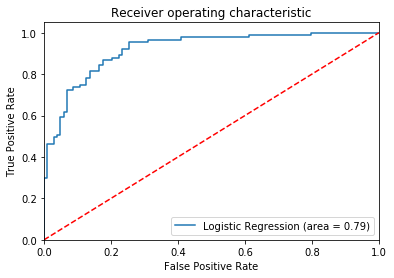

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_validation_pd, logreg.predict(X_validation_pd_v2))
fpr, tpr, thresholds = roc_curve(y_validation_pd, logreg.predict_proba(X_validation_pd_v2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [83]:
## Support Vector Machine using sci-kit learn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC()
clf.fit(X_train_pd_v2,y_train_np)
y_pred_svm = clf.predict(X_validation_pd_v2)
y_pred_svm
print(accuracy_score(y_validation_np,y_pred_svm))
print('Accuracy of SVM classifier on validation set: {:.2f}'.format(clf.score(X_validation_pd_v2, y_validation_np)))

#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(y_validation_np, y_pred_svm)
print(confusion_matrix_svm)

from sklearn.metrics import classification_report
print(classification_report(y_validation_np, y_pred_svm))

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

0.8298969072164949
Accuracy of SVM classifier on validation set: 0.83
[[72 31]
 [ 2 89]]
              precision    recall  f1-score   support

           0       0.97      0.70      0.81       103
           1       0.74      0.98      0.84        91

   micro avg       0.83      0.83      0.83       194
   macro avg       0.86      0.84      0.83       194
weighted avg       0.86      0.83      0.83       194



In [111]:
# Instantiate random forest, train
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=11, random_state=100)

rf.fit(X_train_pd_v2, y_train_np)
y_pred_rf = rf.predict(X_validation_pd_v2)
#y_pred_rf
print(accuracy_score(y_validation_np,y_pred_rf))
print('Accuracy of Random Forest classifier on validation set: {:.2f}'.format(rf.score(X_validation_pd_v2, y_validation_np)))

#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
confusion_matrix_rf = confusion_matrix(y_validation_np, y_pred_rf)
print(confusion_matrix_rf)

from sklearn.metrics import classification_report
print(classification_report(y_validation_np, y_pred_rf))

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.8247422680412371
Accuracy of Random Forest classifier on validation set: 0.82
[[72 31]
 [ 3 88]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81       103
           1       0.74      0.97      0.84        91

   micro avg       0.82      0.82      0.82       194
   macro avg       0.85      0.83      0.82       194
weighted avg       0.86      0.82      0.82       194

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 11, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


v8_t       0.421736
v6         0.179328
v7         0.100253
v13        0.074600
v14_log    0.072027
v2         0.052573
v3         0.049590
v5         0.020185
v4_y       0.013918
v1_b       0.009170
v12_s      0.006621
dtype: float64

Text(0.5,0,'Feature Importance Score')

Text(0,0.5,'Features')

Text(0.5,1,'Visualizing Important Features')

No handles with labels found to put in legend.


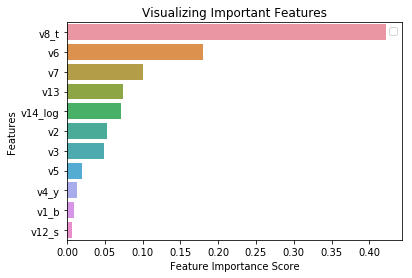

In [113]:
#FEATURE IMPORTTANCE: Use random forest to sense check feature importance

import pandas as pd
feature_imp = pd.Series(rf.feature_importances_,index=X_train_pd_v2.columns).sort_values(ascending=False)
feature_imp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()